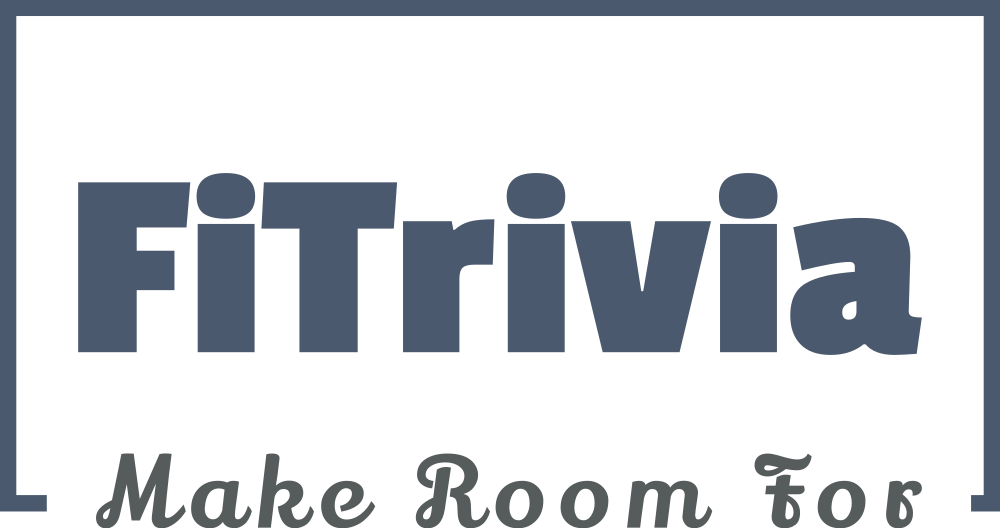

# FiTrivia Backend
---

### Table of Contents

- [Preprocessing](#Preprocessing)
- [Model Input](#Model-Input)
- [Create Model](#Create-Model)
- [Visualization](#Visualization)
- [Test](#Test)

# Preprocessing 
---

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mpPose = mp.solutions.pose
from os import listdir
from os.path import isfile, join

In [52]:
def file_list(dir_name):
    return [f'{dir_name}/' + f for f in listdir(f'{dir_name}/') if isfile(join(f'{dir_name}/', f))]

In [53]:
def split_to_frames(files, destenation_dir):
    count = 0
    for file_name in files:
        vidcap = cv2.VideoCapture(file_name)
        success,image = vidcap.read()
        while success:
            cv2.imwrite(f"{destenation_dir}/frame%d.jpg" % count, image)     # save frame as JPEG file      
            success,image = vidcap.read()
            print('Read a new frame: ', success)
            count += 1
    return count

In [54]:
print(split_to_frames(file_list("test/squat test"), "test frames"))

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [55]:
def save_skeleton(IMAGE_FILES, destenation_dir):
    with mp_holistic.Holistic(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=True,
        refine_face_landmarks=True) as holistic:
        for idx, file in enumerate(IMAGE_FILES):
            try:
                image = cv2.imread(file)
    #             if not(image is np.ndarray):
    #                 continue
                image_height, image_width, _ = image.shape
                # Convert the BGR image to RGB before processing.
                results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


                #annotated_image = cv2.imread('new/frame0.jpg')

                condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
                bg_image = np.zeros(image.shape, dtype=np.uint8)
                bg_image[:] = 100
                image = np.where(condition, image, bg_image)

                mp_drawing.draw_landmarks(
                    image,
                    results.face_landmarks,
                    mp_holistic.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(
                    image,
                    results.pose_landmarks,
                    mp_holistic.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing_styles.
                    get_default_pose_landmarks_style())

                h, w, c = image.shape   # get shape of original frame
                opImg = np.zeros([128, 128, c])  # create blank image with original frame size
                opImg.fill(255)  # set white background. put 0 if you want to make it black

                # draw extracted pose on black white image
                mp_drawing.draw_landmarks(opImg, results.pose_landmarks, mpPose.POSE_CONNECTIONS,
                                       mp_drawing.DrawingSpec((255, 0, 0), 1, 1),
                                       mp_drawing.DrawingSpec((255, 0, 255), 1, 1), 
                                       )

                gray = cv2.cvtColor(opImg.astype('uint8'), cv2.COLOR_RGB2GRAY)
                # display extracted pose on blank images
                cv2.imwrite(f'{destenation_dir}/{idx}.png', gray)
            except:
                print(idx, file)

In [58]:
save_skeleton(file_list("test frames"), "test skelaton")

[Back To The Top](#FiTrivia-Backend)

# Model Input
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
import cv2
import os
import sys

from sklearn.model_selection import train_test_split

# for dirname, _, filenames in os.walk('/kaggle/input'):
#         print(os.path.join(dirname))
categories = ['jumping jacks' , 'squat']

In [8]:
def create_image_array(dir_name):
    image_data= []
    for dr in os.listdir(dir_name + '/'):
        class_index= categories.index(dr)
        path= os.path.join(dir_name + '/', categories[class_index])
        for img in os.listdir(path):
            img_arr= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            image_data.append([img_arr, class_index])

    return image_data

In [9]:
image_data = create_image_array("skelatons")
image_data[0]

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 0]

In [10]:
len(image_data)

27958

In [11]:
def create_image_and_label_arrays(image_data):
    random.shuffle(image_data)

    input_data = []
    label = []
    for x, y in image_data:
        input_data.append(x)
        label.append(y)
    input_data = np.array(input_data)
    label = np.array(label)
    input_data = input_data//255
    input_data = np.array(input_data, dtype=bool)

    return input_data, label

In [12]:
input_data, label = create_image_and_label_arrays(image_data)

In [13]:
print(sys.getsizeof(input_data))
input_data.shape

458064016


(27958, 128, 128)

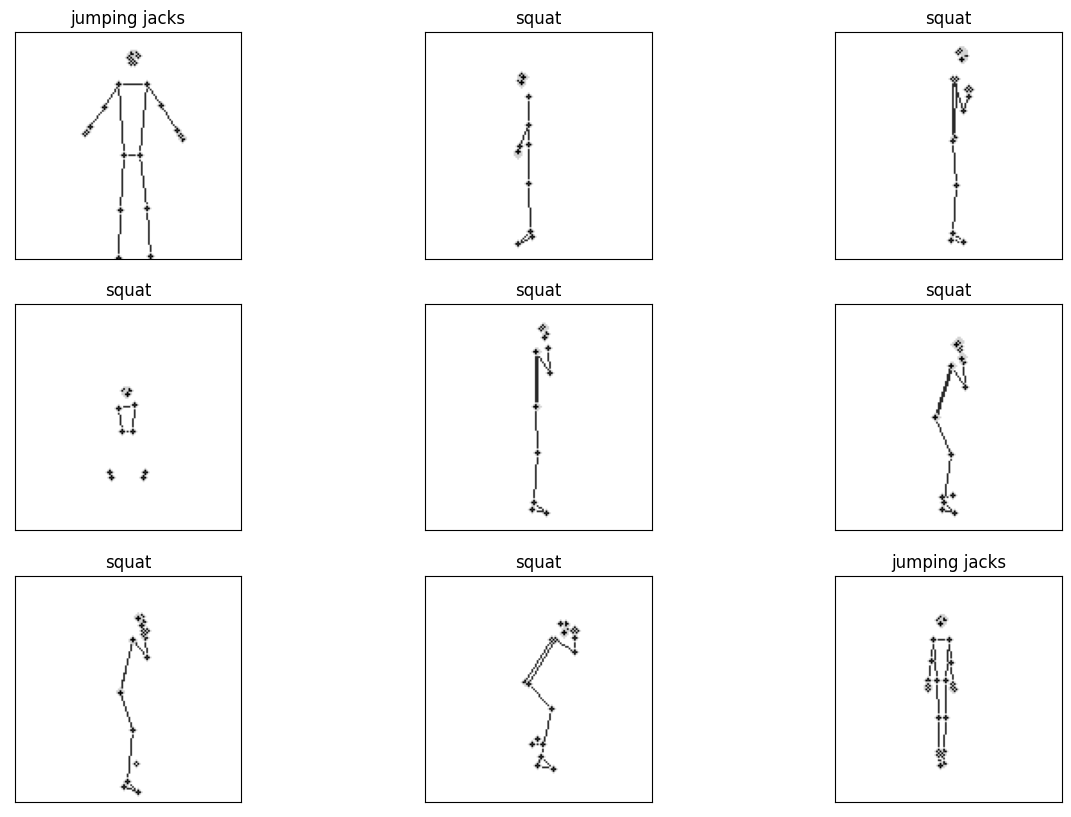

In [14]:
plt.figure(1, figsize=(15,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]])
plt.show()

In [15]:
label = keras.utils.np_utils.to_categorical(label, num_classes=2,dtype='i1')
label[0]

array([0, 1], dtype=int8)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.2, random_state=0)

X_train.shape

(22366, 128, 128)

[Back To The Top](#FiTrivia-Backend)

# Create Model
---

In [17]:
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout, SimpleRNN
from keras.models import Sequential
from keras.utils import np_utils
from keras import backend as K

In [18]:
def First_model():
    model = keras.models.Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128, 128, 1)))
    model.add(Activation('relu'))

    model.add(Conv2D(filters = 32, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))


    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])  
    return model

In [19]:
def Sec_model():
    model = Sequential()

    # Recurrent layers supported: SimpleRNN, LSTM, GRU:
    model.add(SimpleRNN(50, input_shape=(128,1)))

    # To stack multiple RNN layers, all RNN layers except the last one need
    # to have "return_sequences=True".  An example of using two RNN layers:
    #model.add(SimpleRNN(16, input_shape=(1, 500), return_sequences=True))
#     model.add(Dropout(0.3))
#     model.add(SimpleRNN(16, input_shape=(img_rows, img_cols), return_sequences=True))
    model.add(Dropout(0.3))
    #model.add(SimpleRNN(32))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])
    return model

In [20]:
model = First_model()

model.fit(X_train, y_train, epochs = 5, validation_split= 0.2)

Epoch 1/5
560/560 [==============================] - 266s 474ms/step - loss: 0.1469 - accuracy: 0.9705 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 2/5
560/560 [==============================] - 264s 471ms/step - loss: 0.0262 - accuracy: 0.9960 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 3/5
560/560 [==============================] - 275s 491ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 4/5
560/560 [==============================] - 269s 480ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0102 - val_accuracy: 0.9991
Epoch 5/5
560/560 [==============================] - 274s 488ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.3915e-04 - val_accuracy: 1.0000


[Back To The Top](#FiTrivia-Backend)

# Visualization
---

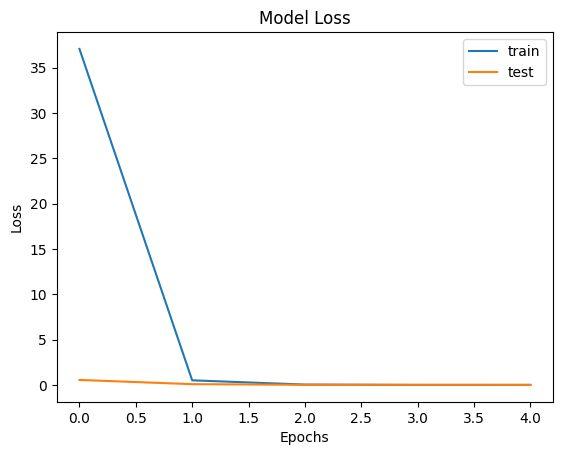

In [16]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

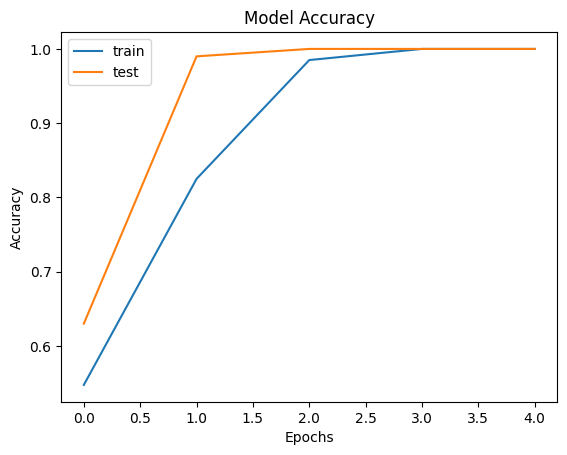

In [17]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

[Back To The Top](#FiTrivia-Backend)

# Test
---

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

4/4 [==============================] - 4s 1s/step - loss: 0.0021 - accuracy: 1.0000
Test accuracy: 100.00%


4/4 [==============================] - 5s 1s/step


[]

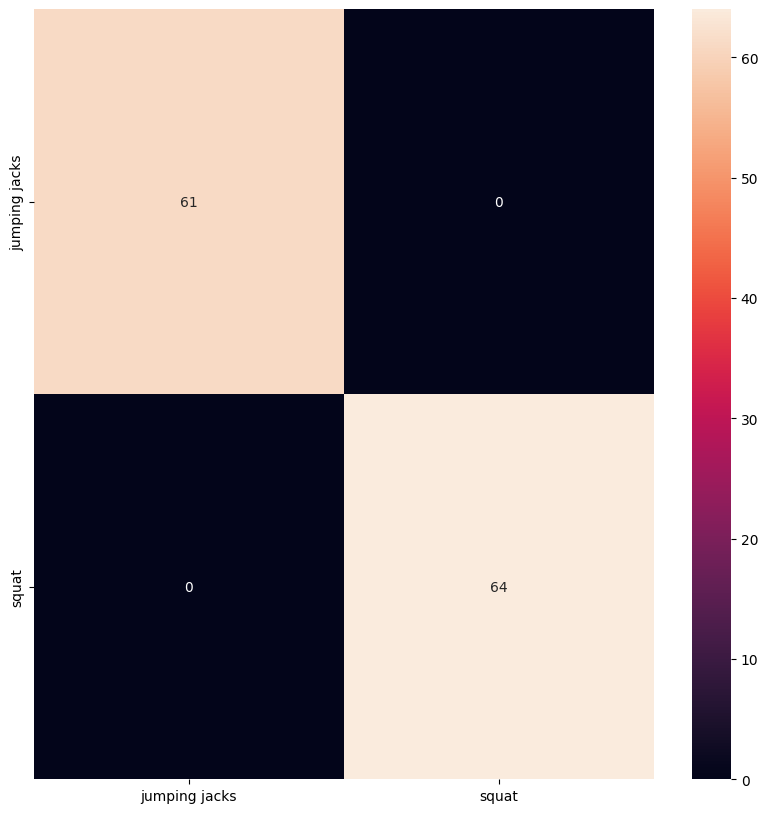

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c for c in categories]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

In [37]:
def test17(dir_name, start):
    img = []
    for i in range(start, start+18):
        img_arr= cv2.imread(f"{dir_name}/{i}.png", cv2.IMREAD_GRAYSCALE)
        #img_arr = cv2.resize(img_arr, (100, 100), interpolation= cv2.INTER_LINEAR)
        img.append(img_arr)

    test_data = np.array(img)
    test_data = test_data//255
    test_data = np.array(test_data, dtype=bool)

    y_proba = model.predict(test_data)

    plt.figure(1, figsize=(15,10))
    for i in range(1,17):
        plt.subplot(4,4,i)
        plt.imshow(test_data[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        x = categories[0] if y_proba[i][0] > y_proba[i][1] else categories[1]
        x += f" {int(max(y_proba[i]) *100)}" + "%"
        plt.title(x)
    plt.show()

1/1 [==============================] - 0s 50ms/step


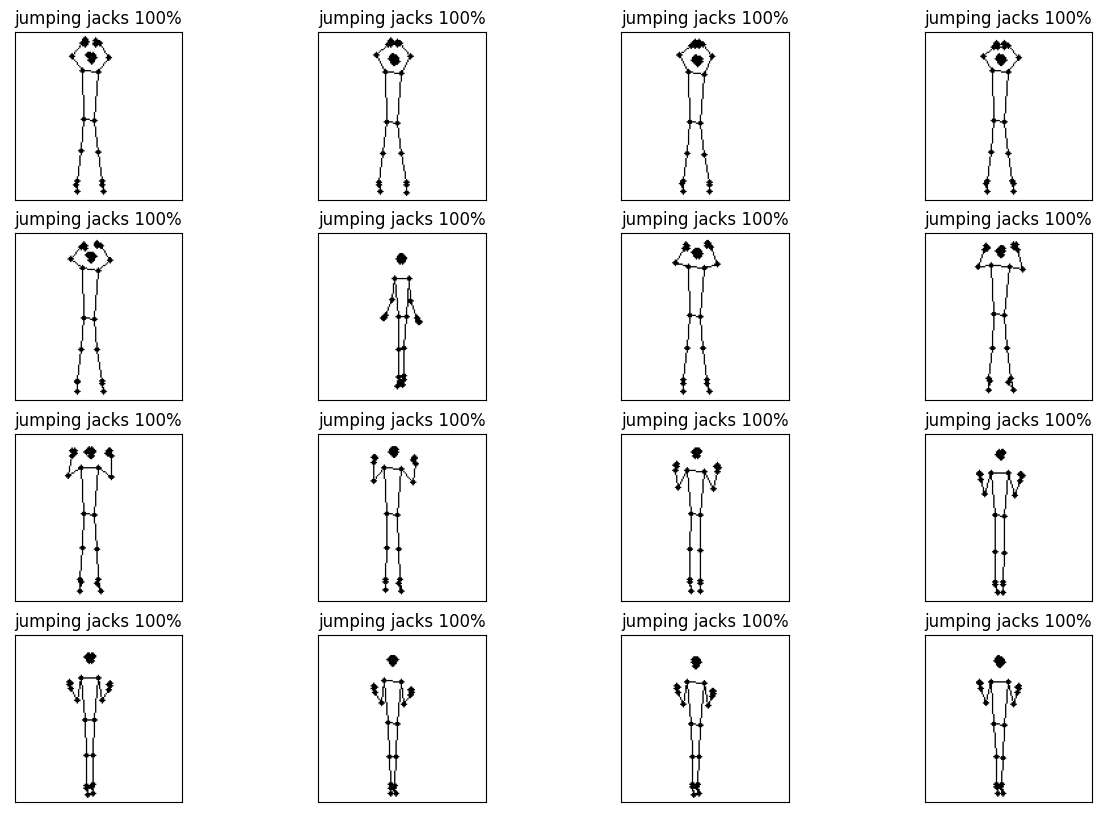

In [46]:
test17('jumping jacks skeleton', 7000)

1/1 [==============================] - 0s 52ms/step


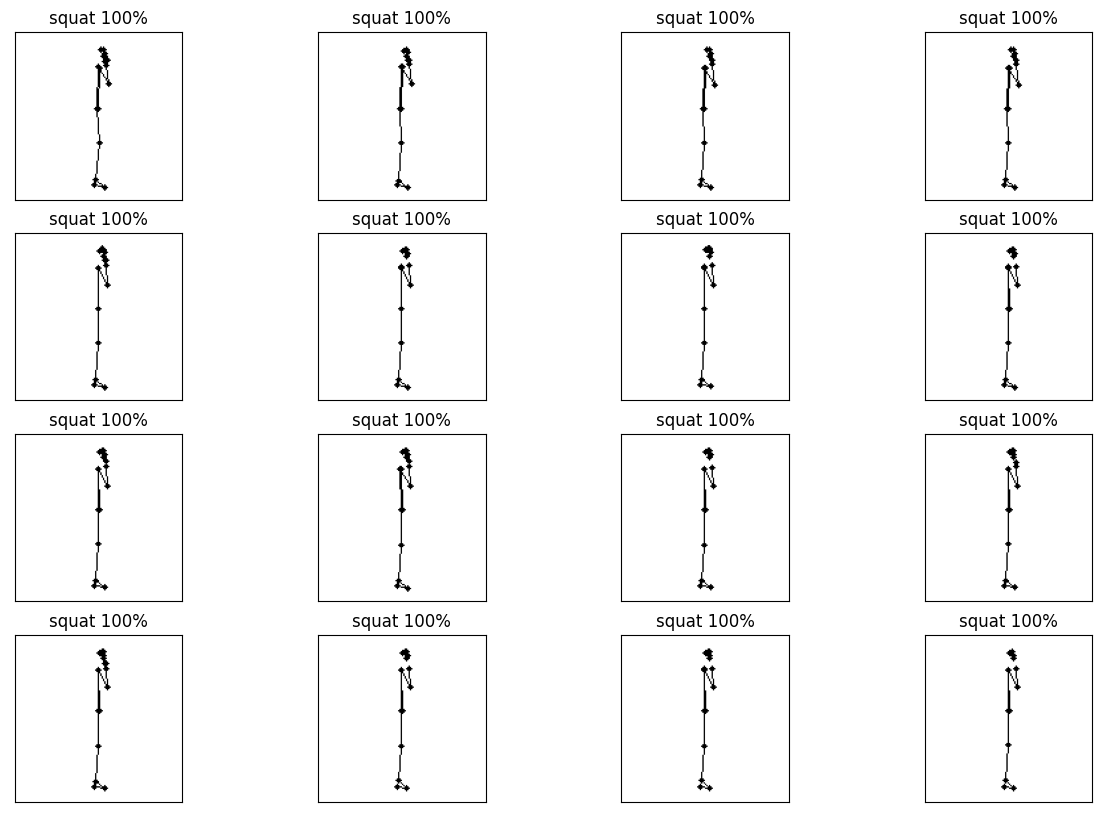

In [45]:
test17('squat skeleton', 10105)

[Back To The Top](#FiTrivia-Backend)

In [29]:
def testPipeline(path,model):
    test_image_data= []
    for img in os.listdir(path):#'testSkele\jumping jacks'):
        img_arr= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        test_image_data.append([cv2.resize(img_arr, (128,128))])
#         test_image_data.append([img_arr])
    random.shuffle(test_image_data)
    test_image_data = np.array(test_image_data)
    test_image_data = test_image_data/255.0
    test_image_data.shape = (-1, 128, 128, 1)
    print("test input shape: ",test_image_data.shape)
    y_pred= model.predict(test_image_data)
    classes = np.argmax(y_pred, axis = 1)
    print("predicted classes: ",classes)
    class_1_count = np.count_nonzero(classes == 1)
    class_0_count= np.count_nonzero(classes == 0)
    print(class_0_count, class_1_count)
    predicted_class = class_1_count > class_0_count
    print("The class is : ",categories[predicted_class])

In [59]:
testPipeline('test\\test jj skele create and then resize',model)

test input shape:  (405, 128, 128, 1)
13/13 [==============================] - 1s 74ms/step
predicted classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
404 1
The class is :  jumping jacks


In [31]:
testPipeline('test\\test squat skele create and then resize',model)

test input shape:  (891, 128, 128, 1)
28/28 [==============================] - 2s 69ms/step
predicted classes:  [0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 

[Back To The Top](#FiTrivia-Backend)

In [60]:
testPipeline('test skelaton',model)

test input shape:  (891, 128, 128, 1)
28/28 [==============================] - 2s 75ms/step
predicted classes:  [0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 